<a href="https://colab.research.google.com/github/Krylze/Data-Science/blob/main/Arboles_de_Decision_y_Bosques_Aleatorios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: montar a drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Aboles de Desicion y Bosques

## Importar Datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/content/drive/MyDrive/Ciencia de Datos/Data/heart_disease.csv")
data.sample(10)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
24,24,40,1,3,140,199,0,1,178,1,1.4,2,0,3,1
17,17,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1
300,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
237,237,60,1,0,140,293,0,0,170,0,1.2,1,2,3,0
49,49,53,0,0,138,234,0,0,160,0,0.0,2,0,2,1
266,266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
283,283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
67,67,45,0,1,130,234,0,0,175,0,0.6,1,0,2,1
265,265,66,1,0,112,212,0,0,132,1,0.1,2,1,2,0
255,255,45,1,0,142,309,0,0,147,1,0.0,1,3,3,0


## Segmentar datos en training y test

In [ ]:
from sklearn.model_selection import train_test_split
x = data.iloc[:, 1:14]
y = data.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

242
61
242
61


# Entrenar Modelo

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="gini", random_state=7, max_depth=6)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print(y_pred[0:10]) #Es un numpay array
print(y_test[0:10]) #Es una serie

[1 1 0 1 1 0 1 0 1 1]
125    1
57     1
282    0
66     1
114    1
281    0
132    1
255    0
37     1
273    0
Name: target, dtype: int64


# Evaluar el modelo

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(" ")
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred, labels = [0, 1]))
print(" ")
print("Classification Report")
print(classification_report(y_test, y_pred))

Accuracy:  0.7213114754098361
 
Confusion Matrix
[[17 13]
 [ 4 27]]
 
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.57      0.67        30
           1       0.68      0.87      0.76        31

    accuracy                           0.72        61
   macro avg       0.74      0.72      0.71        61
weighted avg       0.74      0.72      0.71        61



## Graficar el Arbol

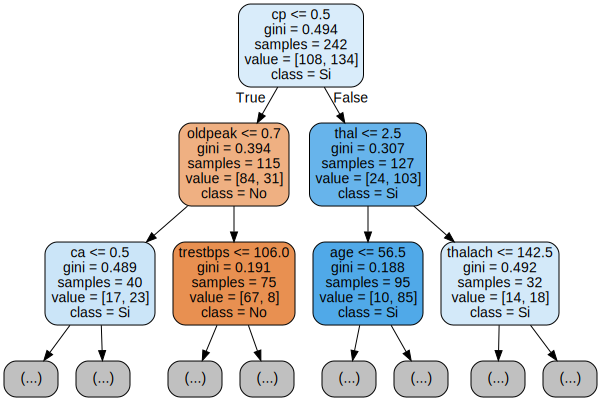

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

graph = export_graphviz(classifier, filled=True, rounded =True, class_names=["No", "Si"], feature_names = list (x.columns), max_depth=2)
graphviz.Source(graph)



# Bosques aleatorios
## Entrenar modelo

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, criterion="gini", random_state=7)
clf.fit(x_train, y_train)
y_predBosque = clf.predict(x_test)
print(y_predBosque[0:10]) #Es un numpay array
print(y_test[0:10]) #Es una serie
#print(clf.score(x_test, y_predBosque))

[1 1 0 1 1 1 1 0 1 1]
125    1
57     1
282    0
66     1
114    1
281    0
132    1
255    0
37     1
273    0
Name: target, dtype: int64


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print("Accuracy: ", accuracy_score(y_test, y_predBosque))
print(" ")
print("Confusion Matrix")
print(confusion_matrix(y_test, y_predBosque, labels = [0, 1]))
print(" ")
print("Classification Report")
print(classification_report(y_test, y_predBosque))

Accuracy:  0.7213114754098361
 
Confusion Matrix
[[18 12]
 [ 5 26]]
 
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.60      0.68        30
           1       0.68      0.84      0.75        31

    accuracy                           0.72        61
   macro avg       0.73      0.72      0.72        61
weighted avg       0.73      0.72      0.72        61



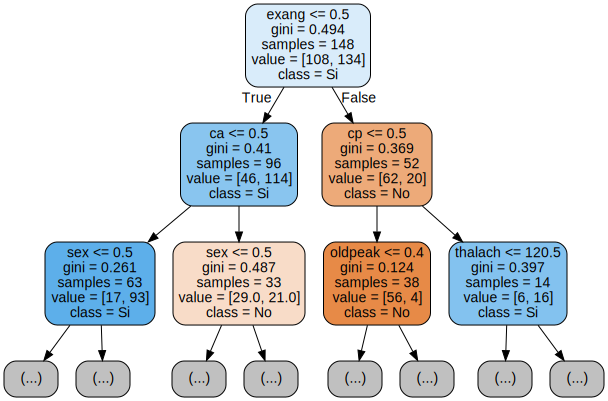

In [ ]:
from math import exp
from sklearn.tree import export_graphviz
import graphviz

tree = clf.estimators_[25]
graph = export_graphviz(tree, filled=True, rounded =True, class_names=["No", "Si"], feature_names = list (x.columns), max_depth=2)
graphviz.Source(graph)